## 이번주 목표(openCV 머신러닝 공식 가이드)               
--- 

- 죄송합니다.. 얼룩말 책 개정판을 못빌렸네요 ㅠㅠㅠ....         
- 얼룩말 책과 노란책의 목차와 서술을 참고하되, 내부 내용은 [python opencv machine learning 튜토리얼](https://docs.opencv.org/master/d6/de2/tutorial_py_table_of_contents_ml.html)을 참고하였습니다. 
- 이번 기회에 공식 문서를 보고 공부하는 방법을 연습해봐도 좋겠네요!

### 목차

0. 머신러닝 개요
1. K-최근접 이웃 알고리즘               
    - K-최근접 이웃 알고리즘       
    - 적용해보기
3. 서포트 벡터 머신      
    - 서포트 벡터 머신 알고리즘     
    - 적용해보기

## 0. 머신러닝 개요          
---

- 머신러닝 : 주어진 데이터를 분석하여 규칙성, 패턴 등을 찾고, 이를 이용하여 의미있는 정보를 추출하는 과정을 말함.

- 학습,훈련(train) : 데이터로부터 규칙성을 찾아내는 과정
- 모델 : 학습, 훈련에 의해 결정된 규칙
- 예측, 추론 : 새로운 데이터를 학습된 모델에 입력으로 전달하고 결과를 판단하는 과정          


- 머신러닝은 크게 __지도학습과 비지도 학습으로 구분한다.__  
- 지도학습 : 정답을 알고 있는 데이터를 이용하여 학습을 진행하는 방식    
- 비지도학습

- 아래의 사진은 지도학습 과정을 이미지로 나타낸 것이다. 

![머신러닝과정](./PostingPic/9_머신러닝과정.jpg)

- 영상 데이터는 픽셀로 이루어져 있지만, 이 픽셀 값을 그대로 머신러닝으로 사용하지는 않는다.

#### Why?
    - 영상 데이터는 조명 변화, 객체의 이동 및 회전 등에 매우 민감하게 반응하므로
    
#### So,
    - 영상의 다양한 변환에도 크게 변경되지 않는 특징 정보를 추출하여 머신 러닝 입력으로 전달함
    - ex) 사과와 바나나 사진을 구분한다고 할 때,
        1. 영상의 주된 색상(hue채널)
        2. 객체 외곽선(동그란 사과와 긴 타원형인 바나나)    
        3. 면적 비율
        
    - 다수의 훈련 영상에서 특징 벡터를 추출하고, 이를 이용하여 머신 러닝 알고리즘을 학습시킴

- 지도학습은 주로 __회귀 또는 분류에 사용됨__
- 회귀 : 연속된 수치 값을 예측하는 작업. ex)학생의 키와 몸무게를 학습한 뒤, 몸무게만 주었을 때 키 예측   
- 분류 : 이산적인 값을 결과로 출력하는 머신러닝. ex) 사과와 바나나의 구분(사과-0클래스, 바나나-1클래스)   


- 비지도학습은 훈련 데이터의 정답에 대한 정보 없이 오로지 데이터 자체만을 이용한 학습 방식    
- 비지도 학습은 주로 __군집화에 사용__ 됨    


#### 학습 후 테스트를 위해 영상의 모든 프레임을 학습에 사용하지는 않고, 일부는 분리하여 테스트로 사용하기도 한다.


#### [파이썬을 활용한 openCV 머신러닝 튜토리얼](https://docs.opencv.org/master/d6/de2/tutorial_py_table_of_contents_ml.html)

### K-최근접 이웃 알고리즘                  
---

## A. KNN 알고리즘의 이론

- K-최근접 이웃 알고리즘 : 분류 또는 회귀에 사용되는 지도학습 알고리즘       
- K-최근접이 분류 태스크에 적용되면 : __특징 공간에서 테스트 데이터와 가장 가까운 k개의 훈련데이터를 찾고, K개의 훈련 데이터를 다수결로 판정하여 테스트 데이터의 클래스를 지정함__       
- K-최근접이 회귀 태스크에 적용되면 : __테스트 데이터에 인접현 k개의 훈련 데이터의 평균을 테스트 데이터 값으로 설정__     

![k-근접](./PostingPic/9_k최근접.jpg)

kNN is one of the simplest classification algorithms available for supervised learning. The idea is to search for the closest match(es) of the test data in the feature space. We will look into it with the below image.

In the image, there are two families: Blue Squares and Red Triangles. We refer to each family as a Class. Their houses are shown in their town map which we call the Feature Space. You can consider a feature space as a space where all data are projected. For example, consider a 2D coordinate space. Each datum has two features, a x coordinate and a y coordinate. You can represent this datum in your 2D coordinate space, right? Now imagine that there are three features, you will need 3D space. Now consider N features: you need N-dimensional space, right? This N-dimensional space is its feature space. In our image, you can consider it as a 2D case with two features.

Now consider what happens if a new member comes into the town and creates a new home, which is shown as the green circle. He should be added to one of these Blue or Red families (or classes). We call that process, Classification. How exactly should this new member be classified? Since we are dealing with kNN, let us apply the algorithm.

One simple method is to check who is his nearest neighbour. From the image, it is clear that it is a member of the Red Triangle family. So he is classified as a Red Triangle. This method is called simply Nearest Neighbour classification, because classification depends only on the nearest neighbour.

But there is a problem with this approach! Red Triangle may be the nearest neighbour, but what if there are also a lot of Blue Squares nearby? Then Blue Squares have more strength in that locality than Red Triangles, so just checking the nearest one is not sufficient. Instead we may want to check some k nearest families. Then whichever family is the majority amongst them, the new guy should belong to that family. In our image, let's take k=3, i.e. consider the 3 nearest neighbours. The new member has two Red neighbours and one Blue neighbour (there are two Blues equidistant, but since k=3, we can take only one of them), so again he should be added to Red family. But what if we take k=7? Then he has 5 Blue neighbours and 2 Red neighbours and should be added to the Blue family. The result will vary with the selected value of k. Note that if k is not an odd number, we can get a tie, as would happen in the above case with k=4. We would see that our new member has 2 Red and 2 Blue neighbours as his four nearest neighbours and we would need to choose a method for breaking the tie to perform classification. So to reiterate, this method is called k-Nearest Neighbour since classification depends on the k nearest neighbours.

Again, in kNN, it is true we are considering k neighbours, but we are giving equal importance to all, right? Is this justified? For example, take the tied case of k=4. As we can see, the 2 Red neighbours are actually closer to the new member than the other 2 Blue neighbours, so he is more eligible to be added to the Red family. How do we mathematically explain that? We give some weights to each neighbour depending on their distance to the new-comer: those who are nearer to him get higher weights, while those that are farther away get lower weights. Then we add the total weights of each family separately and classify the new-comer as part of whichever family received higher total weights. This is called modified kNN or weighted kNN.

- NN
- KNN
- modified k-nn(weighted k-nn)

#### 고려해야 할 점
1. new-comer로 부터 모든 이웃들의 거리를 계산해야 하기 때문에, 모든 '하우스'에 대한 정보를 알아야 함. 하우스가 많다면 그만큼 메모리, 시간 소비량이 늘어날것임         
2. 준비 및 훈련에 거의 'zero' 타임이 걸림. 우리의 "학습"은 오직 데이터를 기억하는것에만 국한되기 때문임.

> Q1. 아래의 코드를 실행시켜보고 위의 알고리즘을 바탕으로 의미를 분석해보세요.

#### 가벼운 테스팅

[0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 0.]


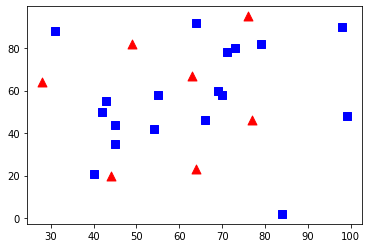

In [8]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

#25개의 랜덤 하우스를 만들어냄
#(random.randint(low, high=None, size=None, dtype=int))
trainData = np.random.randint(0,100,(25,2)).astype(np.float32)

#라벨링
labels = np.random.randint(0,2,(25,1)).astype(np.float32)
print(labels.ravel())

red = trainData[labels.ravel()==0]
plt.scatter(red[:,0], red[:,1], 80, 'r', '^')

blue = trainData[labels.ravel()==1]

#filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
plt.scatter(blue[:,0], blue[:,1], 80, 'b', 's')

plt.show()

[0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1.
 1.]
result:  [[1.]]

neighbours:  [[0. 1. 1.]]

distance:  [[194. 205. 452.]]



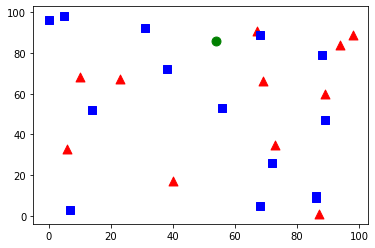

In [11]:
#25개의 랜덤 하우스를 만들어냄
#(random.randint(low, high=None, size=None, dtype=int))
trainData = np.random.randint(0,100,(25,2)).astype(np.float32)

#라벨링
labels = np.random.randint(0,2,(25,1)).astype(np.float32)
print(labels.ravel())

red = trainData[labels.ravel()==0]
plt.scatter(red[:,0], red[:,1], 80, 'r', '^')

blue = trainData[labels.ravel()==1]

#filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
plt.scatter(blue[:,0], blue[:,1], 80, 'b', 's')

newcomer = np.random.randint(0,100,(1,2)).astype(np.float32)
plt.scatter(newcomer[:,0],newcomer[:,1],80,'g','o')

knn = cv.ml.KNearest_create()
knn.train(trainData, cv.ml.ROW_SAMPLE, labels)

ret, results, neighbours ,dist = knn.findNearest(newcomer, 3)
print( "result:  {}\n".format(results) )
print( "neighbours:  {}\n".format(neighbours) )
print( "distance:  {}\n".format(dist) )
plt.show()

## B. 핸드라이팅 Digits을 분류하는 KNN알고리즘을 실행시켜 봅시다.

#### OCR of Hand-written Digits

Our goal is to build an application which can read handwritten digits. For this we need some training data and some test data. OpenCV comes with an image digits.png (in the folder opencv/samples/data/) which has 5000 handwritten digits (500 for each digit). Each digit is a 20x20 image. 

- 20*20 사이즈의 5000개 데이터(10개 종류 * 각 500개) 를 제공하고 있음

So our first step is to split this image into 5000 different digit images. Then for each digit (20x20 image), we flatten it into a single row with 400 pixels. That is our feature set, i.e. intensity values of all pixels. It is the simplest feature set we can create. We use the first 250 samples of each digit as training data, and the other 250 samples as test data. So let's prepare them first.

- 각 사진을 flatten하여 400개의 픽셀로 뽑아내고, 이것이 피쳐 셋이 될 것임           
- 각 글자 500개중 250개는 훈련 데이터, 250개는 테스트 데이터로 사용

> Q2. 아래의 소스코드를 실행시키거나, 직접 주석을 달아봅시다. (샘플 데이터는 opencv/samples/data 아래에 제공되고 있다고 명시하고 있습니다.)

TypeError: Image data of dtype object cannot be converted to float

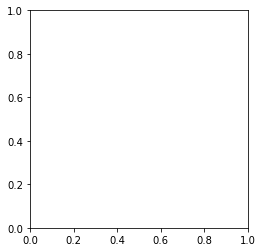

In [40]:
import numpy as np
import cv2 as cv
import os 

img = cv.imread('/PostingPic/digits.png')
plt.imshow(img)
# gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

# # Now we split the image to 5000 cells, each 20x20 size
# cells = [np.hsplit(row,100) for row in np.vsplit(gray,50)]

# # Make it into a Numpy array: its size will be (50,100,20,20)
# x = np.array(cells)

# # Now we prepare the training data and test data
# train = x[:,:50].reshape(-1,400).astype(np.float32) # Size = (2500,400)
# test = x[:,50:100].reshape(-1,400).astype(np.float32) # Size = (2500,400)

# # Create labels for train and test data
# k = np.arange(10)
# train_labels = np.repeat(k,250)[:,np.newaxis]
# test_labels = train_labels.copy()

# # Initiate kNN, train it on the training data, then test it with the test data with k=1
# knn = cv.ml.KNearest_create()
# knn.train(train, cv.ml.ROW_SAMPLE, train_labels)
# ret,result,neighbours,dist = knn.findNearest(test,k=5)

# # Now we check the accuracy of classification
# # For that, compare the result with test_labels and check which are wrong
# matches = result==test_labels
# correct = np.count_nonzero(matches)

# accuracy = correct*100.0/result.size
# print( accuracy )

In [20]:
conda info --envs

# conda environments:
#
base                     /home/ssac23/anaconda3
CV                       /home/ssac23/anaconda3/envs/CV
Jeongeun                 /home/ssac23/anaconda3/envs/Jeongeun
aiffel                *  /home/ssac23/anaconda3/envs/aiffel
visionEnv                /home/ssac23/anaconda3/envs/visionEnv


Note: you may need to restart the kernel to use updated packages.


In [ ]:
anaconda3/envs/aiffel/lib/python3.7/site-packages

So our basic OCR app is ready. This particular example gave me an accuracy of 91%. One option to improve accuracy is to add more data for training, especially for the digits where we had more errors.

Instead of finding this training data every time I start the application, I better save it, so that the next time, I can directly read this data from a file and start classification. This can be done with the help of some Numpy functions like np.savetxt, np.savez, np.load, etc. Please check the NumPy docs for more details.

In [ ]:
# Save the data
np.savez('knn_data.npz',train=train, train_labels=train_labels)
# Now load the data
with np.load('knn_data.npz') as data:
    print( data.files )
    train = data['train']
    train_labels = data['train_labels']

In my system, it takes around 4.4 MB of memory. Since we are using intensity values (uint8 data) as features, it would be better to convert the data to np.uint8 first and then save it. It takes only 1.1 MB in this case. Then while loading, you can convert back into float32.

### OCR을 영어 알파벳에 적용해보기

Next we will do the same for the English alphabet, but there is a slight change in data and feature set. Here, instead of images, OpenCV comes with a data file, letter-recognition.data in opencv/samples/cpp/ folder. If you open it, you will see 20000 lines which may, on first sight, look like garbage. Actually, in each row, the first column is a letter which is our label. The next 16 numbers following it are the different features. These features are obtained from the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php). You can find the details of these features in [this page](http://archive.ics.uci.edu/ml/datasets/Letter+Recognition).

There are 20000 samples available, so we take the first 10000 as training samples and the remaining 10000 as test samples. We should change the letters to ascii characters because we can't work with letters directly.

In [ ]:
import cv2 as cv
import numpy as np
# Load the data and convert the letters to numbers
data= np.loadtxt('letter-recognition.data', dtype= 'float32', delimiter = ',',
                    converters= {0: lambda ch: ord(ch)-ord('A')})
# Split the dataset in two, with 10000 samples each for training and test sets
train, test = np.vsplit(data,2)
# Split trainData and testData into features and responses
responses, trainData = np.hsplit(train,[1])
labels, testData = np.hsplit(test,[1])
# Initiate the kNN, classify, measure accuracy
knn = cv.ml.KNearest_create()
knn.train(trainData, cv.ml.ROW_SAMPLE, responses)
ret, result, neighbours, dist = knn.findNearest(testData, k=5)
correct = np.count_nonzero(result == labels)
accuracy = correct*100.0/10000
print( accuracy )

- 학습이 된 경우 정확도 93.22% 정도가 나올 것이라고 합니다. 정확도를 올리기 위해, 더 많은 데이터를 수집하여 적용해봅시다! 

> Q3. Exercise : 여기서 우리는 k=5 로 설정했습니다. 만약 다른 K값을 사용하면 어떤 결과가 나올까요? 정확도를 극대화할 수 있는 k를 찾을 수 있을까요? 

## SVM(서포트 벡터 머신)          
---

### A. 서포트 벡터 머신 알고리즘

- 서포트 벡터 머신은 __두 개의 클래스로 구성된 데이터를 가장 여유있게 분리하는 초평면을 찾는 머신러닝 알고리즘이다.__   
- ex) 2차원 공간상의 경우는 두 클래스의 데이터를 분리하는 직선 형태로, 3차원 공간의 경우는 3차원 공간에서의 평면의 방정식이 된다.

- __SVM 알고리즘은 지도학습의 일종이며, 분류와 회귀에 사용된다.__ 

![svm](./PostingPic/9_svm.jpg)

- (a)그림에서, 
    - 직선 (1)과 (2)는 삼각형 사각형을 서로 잘 분리한다.      
    - 하지만, 1번 직선은 왼쪽으로 조금만 움직여도 아슬아슬하고, 2번 직선은 오른쪽으로 조금만 움직여도 아슬아슬하다.
    - 이를 잘 해결하기 위해 __그림 (b)처럼 적당한 간격을 가진 초평면 (3)번 직선을 찾으려는 것이 svm이다.__  

- 3번 직선에서 가장 가까운 빨간색/파란색 점과의 거리를 마진(margin)이라고 한다.
- __SVM은 이 마진을 최대화하는 초평면을 구하는 알고리즘이다.__

- 서포트 벡터
- 서포트 플레인

Weight vector decides the orientation of decision boundary while bias point decides its location.

Non-Linearly Separable Data
Consider some data which can't be divided into two with a straight line. For example, consider an one-dimensional data where 'X' is at -3 & +3 and 'O' is at -1 & +1. Clearly it is not linearly separable. But there are methods to solve these kinds of problems. If we can map this data set with a function, f(x)=x2, we get 'X' at 9 and 'O' at 1 which are linear separable.

Otherwise we can convert this one-dimensional to two-dimensional data. We can use f(x)=(x,x2) function to map this data. Then 'X' becomes (-3,9) and (3,9) while 'O' becomes (-1,1) and (1,1). This is also linear separable. In short, chance is more for a non-linear separable data in lower-dimensional space to become linear separable in higher-dimensional space.

1. SVM 알고리즘은 기본적으로 선형으로 분리 가능한 데이터에 적용할 수 있다.    
2. 하지만, 선형으로 분리되지 않는 경우(아래 그림의 a에 대항)
    - SVM 알고리즘을 적용하기 위해 __커널 트릭__ 이라는 기법을 사용한다.
    
![커널트릭](./PostingPic/9_커널트릭.jpg)
    
#### 커널트릭

- (a) 그림과 같이 2차원 평면상에서 분리가 어려운 경우, 
- (b) 그림처럼 데이터의 특징을 반영한 공간의 __차원을 증가시켜__ 데이터를 선형분리하는 것을 커널트릭이라 한다.

- 아래의 표는 svm알고리즘에서 사용하는 커널 함수의 종류이다. 

![커널함수종류](./PostingPic/9_커널종류.png)

## B. 위와 동일하게, 핸드라이팅 Digits을 분류하는 SVM을 적용해 봅시다.

[이 튜토리얼을 참고하였습니다.](https://docs.opencv.org/master/dd/d3b/tutorial_py_svm_opencv.html)

### OCR of Hand-written Digits

In kNN, we directly used pixel intensity as the feature vector. This time we will use Histogram of Oriented Gradients (HOG) as feature vectors.
- 이번에는 특징 벡터를 추출하기 위해 HOG를 사용합니다.

Here, before finding the HOG, we deskew the image using its second order moments. So we first define a function deskew() which takes a digit image and deskew it. Below is the deskew() function:

> Q4.아래의 코드를 한 번 분석해보세요.

In [ ]:
#deskew는 기울기 보정이라는 의미라고 합니당
#왜 하는지 기술적 이유를 아시는분?
def deskew(img):
    #배열, 이진화 이미지
    m = cv.moments(img)
    
    print(m)
    
    if abs(m['mu02']) < 1e-2:
        return img.copy()
    
    skew = m['mu11']/m['mu02']
    M = np.float32([[1, skew, -0.5*SZ*skew], [0, 1, 0]])
    
    #아핀변환으로 기울어진 그림을 정위치로 변환
    img = cv.warpAffine(img,M,(SZ, SZ),flags=affine_flags)
    return img

![모멘트구조](./PostingPic/9_모멘트구조.png)

![deskdew](./PostingPic/9_deskdew.png)

- 위의 그림 중 왼쪽은 오리지널 이미지, 오른쪽은 deskew 함수를 적용한 이미지이다.

### HOG 함수 적용하기

Next we have to find the HOG Descriptor of each cell. For that, we find Sobel derivatives of each cell in X and Y direction. Then find their magnitude and direction of gradient at each pixel. This gradient is quantized to 16 integer values. Divide this image to four sub-squares. For each sub-square, calculate the histogram of direction (16 bins) weighted with their magnitude. So each sub-square gives you a vector containing 16 values. Four such vectors (of four sub-squares) together gives us a feature vector containing 64 values. This is the feature vector we use to train our data.

- x, y 디렉션에 대한 소벨 연산자 추출(가장자라)     
- 각 픽셀의 gradient 방향과 정도를 추출
- So each sub-square gives you a vector containing 16 values, = 16*4 = 64
- 이렇게 뽑아낸 64개의 피쳐가 우리의 train data가 됨.

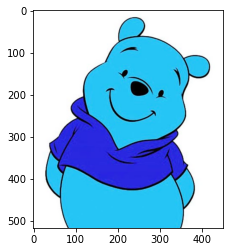

In [33]:
path = './PostingPic/pooh.jpg'

img = cv.imread(path)

plt.imshow(img)

In [35]:
gx = cv.Sobel(img, cv.CV_32F, 1, 0)
gy = cv.Sobel(img, cv.CV_32F, 0, 1)

In [37]:
mag, ang = cv.cartToPolar(gx, gy)
print('mag:', mag, 'ang', ang)

mag: [[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]] ang [[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0

In [38]:
bins = np.int32(bin_n*ang/(2*np.pi))
print(bin_n)

16


In [ ]:
def hog(img):
    
    gx = cv.Sobel(img, cv.CV_32F, 1, 0)
    gy = cv.Sobel(img, cv.CV_32F, 0, 1)
    
    mag, ang = cv.cartToPolar(gx, gy)
    print('mag:', mag, 'ang', ang)
    
    bins = np.int32(bin_n*ang/(2*np.pi))    # quantizing binvalues in (0...16)
    
    bin_cells = bins[:10,:10], bins[10:,:10], bins[:10,10:], bins[10:,10:]
    mag_cells = mag[:10,:10], mag[10:,:10], mag[:10,10:], mag[10:,10:]
    
    hists = [np.bincount(b.ravel(), m.ravel(), bin_n) for b, m in zip(bin_cells, mag_cells)]
    hist = np.hstack(hists)     # hist is a 64 bit vector
    
    return hist

In [32]:
hog(image)

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.11622777e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.82842708e+00, 3.16227770e+00,
       9.81806779e+01, 9.62453097e+01, 8.94427204e+00, 6.83294864e+01,
       6.26717661e+02, 0.00000000e+00, 6.81117440e+01, 8.59605088e+01,
       1.97960738e+06, 1.49755173e+06, 1.30467023e+06, 1.62750825e+06,
       1.53193888e+06, 1.37370296e+06, 1.51575134e+06, 2.17639360e+06,
      

### 학습에 적용하기

- 위의 특징들을 가지고, 데이터셋에 학습을 적용해보자.

[소스코드 풀버전](https://github.com/opencv/opencv/blob/master/samples/python/tutorial_code/ml/py_svm_opencv/hogsvm.py)

TypeError: Image data of dtype object cannot be converted to float

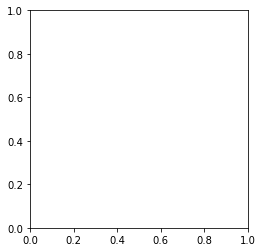

In [45]:
path = os.getenv('HOME')+ '/ShowMeTheCV/Jeongeun/PostingPic/digits.png'
img = cv.imread(path)

plt.imshow(img)

- 거의 94% 의 정확도가 나올 것이다. 다양한 파라미터를 적용하여, 더 높은 정확도가 나올 수 있도록 다양하게 트레이닝해보자.

> Q5. OpenCV samples contain digits.py which applies a slight improvement of the above method to get improved result. It also contains the reference. Check it and understand it.

opencv 샘플은 digits.py 파일을 포함하고 있습니다.. 이는 위의 결과보다 약간 더 향상된 결과를 내는 소스코드입니다. 이 샘플을 확인하고, 이해해봅시다.

#### 오늘 실습은 여기까지입니다. 

###### 아무래도 책 내용이 정리된 것이 아니고, 단순히 openCV에서 제공하는 튜토리얼을 정리한 것이니 만큼 부족한 부분이 많을 것입니다. ㅠㅠㅠ 실습을 진행하시거나, 찬찬히 읽어보시면서 openCV에서의 머신러닝 활용에 대해 공부해보시고 토요일 오전에 뵙겠습니다!!